Aim : To apply average and median filter on the given test images
B051 
Ved Naik
B1 Lab3

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from scipy import signal
from random import randint

In [25]:
image = io.imread("baboon.png")
sh=image.shape
mu,sigma  = 0,20 #mu is mean
rows = sh[0] 
cols =sh[1]
gn=np.random.normal(mu,sigma,(rows,cols))   #gaussian image

In [26]:
gn.shape

(512, 512)

In [27]:
gn

array([[-10.74533457,  22.59713646, -29.53909408, ...,  21.74917212,
          4.72003013,  35.78286546],
       [ -8.80315573, -16.39311002,   9.44349195, ...,   8.33742353,
         -3.73747243,  16.81594806],
       [-55.76118986, -13.15714822,   6.13579323, ..., -11.57711131,
         -5.71027167,  -5.87831188],
       ...,
       [ 14.14092865,  24.56079228,   9.55673027, ..., -30.50017885,
        -28.28619486,  -6.40106707],
       [ 37.66306586,  29.0791674 ,  -9.69718471, ..., -10.67923615,
         31.42141974, -31.04882808],
       [ 19.92643557, -18.77826452, -33.55496115, ...,  12.02658457,
         -4.24714173,  -0.27135196]])

In [28]:
image_gn=image.copy()

In [29]:
image_gn.shape

(512, 512, 3)

In [30]:
image_gn[:,:,0]=image_gn[:,:,0]+gn 
image_gn[:,:,1]=image_gn[:,:,1]+gn 
image_gn[:,:,2]=image_gn[:,:,2]+gn 

In [59]:
size = 20
avg_filter=np.ones((size,size))
avg_filter=avg_filter/(size*size)

In [60]:
filtered_image=image_gn.copy()
filtered_image[:,:,0]=signal.convolve2d(image_gn[:,:,0],avg_filter,mode='same')
filtered_image[:,:,1]=signal.convolve2d(image_gn[:,:,1],avg_filter,mode='same')
filtered_image[:,:,2]=signal.convolve2d(image_gn[:,:,2],avg_filter,mode='same')

Text(0.5, 1.0, 'Filtered image')

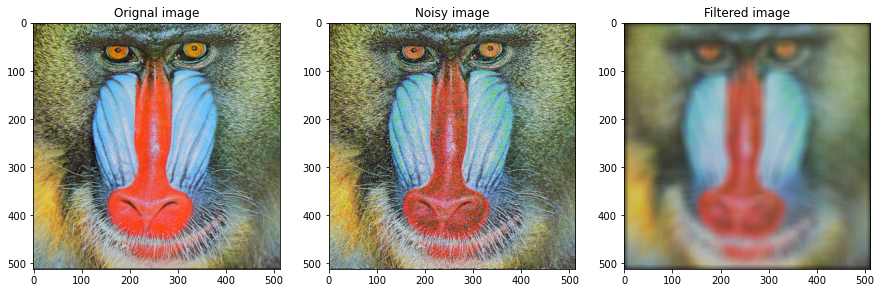

In [61]:
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.imshow(image)
plt.title('Orignal image')
plt.subplot(1,3,2)
plt.imshow(image_gn)
plt.title('Noisy image')
plt.subplot(1,3,3)
plt.imshow(filtered_image)
plt.title('Filtered image')

In [63]:
from skimage.color import rgb2gray
from random import seed

In [67]:
image_ori =image.copy()
image_ori =rgb2gray(image_ori)
image_spnoise = image_ori.copy()

In [136]:
p=0.5 # 50% of total number of pixels
pixels_sp = (rows*cols)*p # sp is salt and pepper
sp=1

for i in range(int(pixels_sp)):
    temp1=randint(0,rows-1)
    temp2=randint(0,cols-1)
    image_spnoise[temp1][temp2]=sp
    if sp==1:
        sp=0
    else:
        sp=1

Text(0.5, 1.0, 'Noisy image')

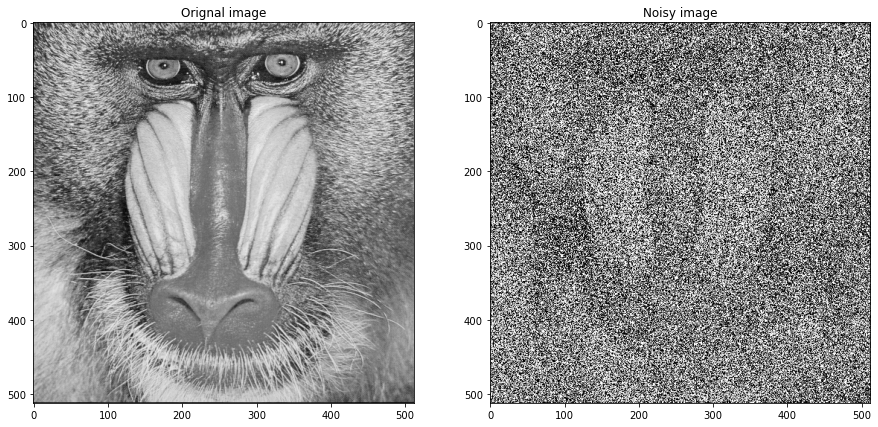

In [137]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(image_ori,cmap='gray')
plt.title('Orignal image')
plt.subplot(1,2,2)
plt.imshow(image_spnoise,cmap='gray')
plt.title('Noisy image')

In [144]:
filtered_imagesp=image_spnoise.copy()
size=13
center = int((size-1)/2)
med = int(((size*size)-1)/2)
for r in range(rows-size):            # Choosing 13*13 matrix and applying filter
    for c in range(cols-size):
        temp1=image_spnoise[r:r+size,c:c+size]
        temp2=np.reshape(temp1,(1,size*size))
        temp3=np.sort(temp2)
        filtered_imagesp[r+center,c+center]=temp3[0,med]

Text(0.5, 1.0, 'Filtered image')

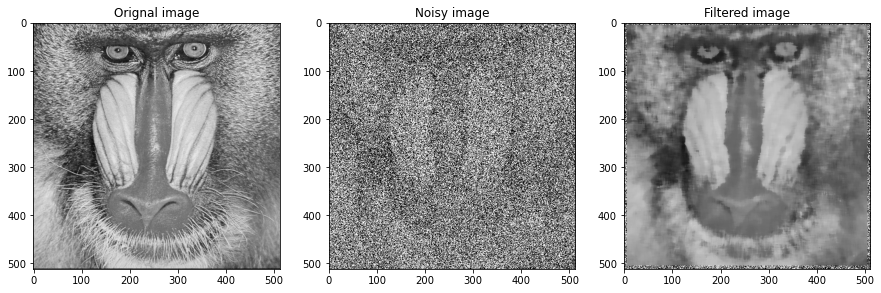

In [145]:
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.imshow(image_ori,cmap='gray')
plt.title('Orignal image')
plt.subplot(1,3,2)
plt.imshow(image_spnoise,cmap='gray')
plt.title('Noisy image')
plt.subplot(1,3,3)
plt.imshow(filtered_imagesp,cmap='gray')
plt.title('Filtered image')

In [125]:
temp3.shape

(1, 25)

In [126]:
temp3

array([[0.3003949 , 0.31343216, 0.31572118, 0.31792196, 0.31806275,
        0.32172353, 0.32198275, 0.33895843, 0.34002353, 0.34157569,
        0.34363882, 0.35487569, 0.35570275, 0.35794196, 0.36005412,
        0.36576314, 0.36833843, 0.37212706, 0.37517137, 0.38548314,
        0.39571255, 0.40038941, 0.40137686, 0.41770471, 0.42362824]])

Conclusion : Average filter of 3x3 is applied to the given noisy test image and it is observed that the given size is not effective in reducing the noise. if avg filter of size 15x15 is applied on the nosiy image, filtered image is much better then the filter of size 3x3. However, the filtered image is quite blurry. 10% of the pixels of the given image are added with salt and pepper noise. After applying median filter, most of the noise disappears. If 40% of the pixels are converted of salt and pepper nosie ,then median filter of size 13x13 is reqired to remove the noise.